In [100]:
import pandas as pd
import sklearn as skl
import numpy as np
import matplotlib
import sys
import matplotlib.pyplot as plt
from matplotlib.pyplot import matshow
from sklearn.datasets import fetch_openml
from sklearn.cluster import MiniBatchKMeans

# II- Affichage des données MNIST 

In [20]:
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)

In [21]:
y = y.astype(np.uint8)

## 1- Clutering

In [29]:
#1)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=10000)

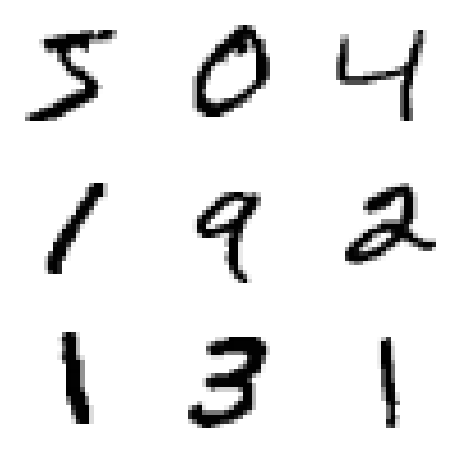

In [43]:
#2)
plt.figure(figsize=(8,8))
for i in range(9):
    some_digit = X[i]
    digit = some_digit.reshape(28,28)
    plt.subplot(3, 3, i+1)
    plt.axis('off')
    plt.imshow(digit, cmap=plt.cm.gray_r)
plt.show()

In [73]:
#3)
X = x_train.reshape(len(x_train),-1)
Y = y_train


X = X.astype('float32')

X /= 255


In [74]:
print(x_train.shape)

(60000, 784)


In [75]:
#4)
n_digits = len(np.unique(y_test))
kmeans = MiniBatchKMeans(n_clusters=n_digits)
kmeans.fit(X)
kmeans.labels_

array([1, 1, 0, ..., 3, 0, 4])

In [80]:
#5)
def infer_cluster_labels(kmeans, actual_labels):
    inferred_labels = {}

    for i in range(kmeans.n_clusters):

        # find index of points in cluster
        labels = []
        index = np.where(kmeans.labels_ == i)

        # append actual labels for each point in cluster
        labels.append(actual_labels[index])

        # déterminer le label le plus commun
        if len(labels[0]) == 1:
            counts = np.bincount(labels[0])
        else:
            counts = np.bincount(np.squeeze(labels))

        # assign the cluster to a value in the inferred_labels dictionary
        if np.argmax(counts) in inferred_labels:
            # append the new number to the existing array at this slot
            inferred_labels[np.argmax(counts)].append(i)
        else:
            # create a new array in this slot
            inferred_labels[np.argmax(counts)] = [i]



    return inferred_labels


In [103]:
def infer_data_labels(X_labels, cluster_labels):
  
    predicted_labels = np.zeros(len(X_labels)).astype(np.uint8)

    for i, cluster in enumerate(X_labels):
        for key, value in cluster_labels.items():
            if cluster in value:
                predicted_labels[i] = key

    return predicted_labels

    # test des 2 fonctions

cluster_labels = infer_cluster_labels(kmeans, Y)
X_clusters = kmeans.predict(X)
predicted_labels = infer_data_labels(X_clusters, cluster_labels)
print (predicted_labels[:10])
print (Y[:10])

[2 2 2 2 2 2 2 2 2 2]
[9 7 8 9 7 3 9 7 0 2]


In [92]:
#6)
from sklearn import metrics
def calculate_metrics(estimator, data, labels):

    # Calculate and print metrics
    print('Number of Clusters: {}'.format(estimator.n_clusters))
    print('Inertia: {}'.format(estimator.inertia_))
    print('Homogeneity: {}'.format(metrics.homogeneity_score(labels, estimator.labels_)))

In [93]:

clusters = [10, 16, 36, 64, 144, 256]

# test different numbers of clusters
for n_clusters in clusters:
    estimator = MiniBatchKMeans(n_clusters = n_clusters)
    estimator.fit(X)
    
    # print cluster metrics
    calculate_metrics(estimator, X, Y)
    
    # determine predicted labels
    cluster_labels = infer_cluster_labels(estimator, Y)
    predicted_Y = infer_data_labels(estimator.labels_, cluster_labels)
    
    # calculate and print accuracy
    print('Accuracy: {}\n'.format(metrics.accuracy_score(Y, predicted_Y)))

Number of Clusters: 10
Inertia: 2.077049493434513e-18
Homogeneity: 0.4665395024036438
Accuracy: 0.60225

Number of Clusters: 16
Inertia: 1.894758604870743e-18
Homogeneity: 0.5471664900952594
Accuracy: 0.6270333333333333

Number of Clusters: 36
Inertia: 1.6872301266349927e-18
Homogeneity: 0.6901908873825108
Accuracy: 0.7745333333333333

Number of Clusters: 64
Inertia: 1.557605192948679e-18
Homogeneity: 0.7391648201345303
Accuracy: 0.8090166666666667

Number of Clusters: 144
Inertia: 1.402911167250514e-18
Homogeneity: 0.8046309173053833
Accuracy: 0.86375

Number of Clusters: 256
Inertia: 1.3026680760571508e-18
Homogeneity: 0.837223645449462
Accuracy: 0.8923833333333333

